<link rel="stylesheet" href="estilo.css">

<img src="img/logoifsc.png">

---

Prof. Carlos Andrés Ferrero

# Mineração de Dados

## Pré-Processamento de Dados no Conjunto de Dados Shelter Animals
    
---

## Problema: predição do destino de animais em abrigos

- Aproximadamente 7,6 milhões de animais são recolhidos em abrigos. Muitos desses animais tem a sorte de voltar aos seus donos ou ainda serem adotados, mas não todos contam com essa sorte. Muitos animais esperam a vida inteira por uma família que possa adotá-lo. 2.7 milhões de cachorros e gatos sofrem eutanasia todo ano nos estados unidos. O Centro Animal de Austin divulgou dados sobre mais de 25.000 animais para a comunidade de Data Mining auxiliá-los a predizer qual será o destino dos animais. Mais informações no site da [Kaggle](https://www.kaggle.com/c/shelter-animal-outcomes)

## Visão Geral dos Dados

In [1]:
library(data.table)
dt <- fread("data/train.csv")
head(dt,5)

AnimalID Name    DateTime            OutcomeType     OutcomeSubtype
1 A671945  Hambone 2014-02-12 18:22:00 Return_to_owner               
2 A656520  Emily   2013-10-13 12:44:00 Euthanasia      Suffering     
3 A686464  Pearce  2015-01-31 12:28:00 Adoption        Foster        
4 A683430          2014-07-11 19:09:00 Transfer        Partner       
5 A667013          2013-11-15 12:52:00 Transfer        Partner       
  AnimalType SexuponOutcome AgeuponOutcome Breed                      
1 Dog        Neutered Male  1 year         Shetland Sheepdog Mix      
2 Cat        Spayed Female  1 year         Domestic Shorthair Mix     
3 Dog        Neutered Male  2 years        Pit Bull Mix               
4 Cat        Intact Male    3 weeks        Domestic Shorthair Mix     
5 Dog        Neutered Male  2 years        Lhasa Apso/Miniature Poodle
  Color      
1 Brown/White
2 Cream Tabby
3 Blue/White 
4 Blue Cream 
5 Tan

## Ativdade

- (1) Apresente tabelas com a frequência (contagem e percentual) dos possíveis valores dos atributos **AnimalType**, **SexuponOutcome** e **AgeuponOutcome**. Apresente um gráfico para esses atributos que também mostre a frequência ou proporção dos possíveis valores.

### Tabelas de Frequência

In [2]:
n <- nrow(dt)
dt.AnimalType.freq <- dt[,.(contagem = .N, percentual = .N/n),by=.(AnimalType)]
dt.AnimalType.freq

AnimalType contagem percentual
1 Dog        15595    0.5834487 
2 Cat        11134    0.4165513

In [3]:
dt.SexuponOutcome.freq <- dt[,.(contagem = .N, percentual = .N/n),by=.(SexuponOutcome)]
dt.SexuponOutcome.freq

SexuponOutcome contagem percentual  
1 Neutered Male  9779     3.658573e-01
2 Spayed Female  8820     3.299787e-01
3 Intact Male    3525     1.318792e-01
4 Intact Female  3511     1.313555e-01
5 Unknown        1093     4.089192e-02
6                   1     3.741255e-05

In [4]:
dt.AgeuponOutcome.freq <- dt[,.(contagem = .N, percentual = .N/n),by=.(AgeuponOutcome)]
head(dt.AgeuponOutcome.freq)

AgeuponOutcome contagem percentual
1 1 year         3969     0.14849040
2 2 years        3742     0.13999776
3 3 weeks         659     0.02465487
4 1 month        1281     0.04792547
5 5 months        652     0.02439298
6 4 years        1071     0.04006884

### Gráficos de Frequência

In [5]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=3)
ggplot( data = dt.AnimalType.freq, aes(x = AnimalType, y = contagem) ) + geom_col()

In [6]:
ggplot( data = dt, aes(x = AnimalType) ) + geom_bar()

In [7]:
ggplot( data = dt, aes(x = SexuponOutcome) ) + geom_bar() + coord_flip()

In [8]:
dt[,c("a","b") := tstrsplit(SexuponOutcome," ", fixed=T)]
head(dt)

AnimalID Name    DateTime            OutcomeType     OutcomeSubtype
1 A671945  Hambone 2014-02-12 18:22:00 Return_to_owner               
2 A656520  Emily   2013-10-13 12:44:00 Euthanasia      Suffering     
3 A686464  Pearce  2015-01-31 12:28:00 Adoption        Foster        
4 A683430          2014-07-11 19:09:00 Transfer        Partner       
5 A667013          2013-11-15 12:52:00 Transfer        Partner       
6 A677334  Elsa    2014-04-25 13:04:00 Transfer        Partner       
  AnimalType SexuponOutcome AgeuponOutcome Breed                            
1 Dog        Neutered Male  1 year         Shetland Sheepdog Mix            
2 Cat        Spayed Female  1 year         Domestic Shorthair Mix           
3 Dog        Neutered Male  2 years        Pit Bull Mix                     
4 Cat        Intact Male    3 weeks        Domestic Shorthair Mix           
5 Dog        Neutered Male  2 years        Lhasa Apso/Miniature Poodle      
6 Dog        Intact Female  1 month        Cairn Terrier/Chihuahua Shorthair
  Color       a        b     
1 Brown/White Neutered Male  
2 Cream Tabby Spayed   Female
3 Blue/White  Neutered Male  
4 Blue Cream  Intact   Male  
5 Tan         Neutered Male  
6 Black/Tan   Intact   Female

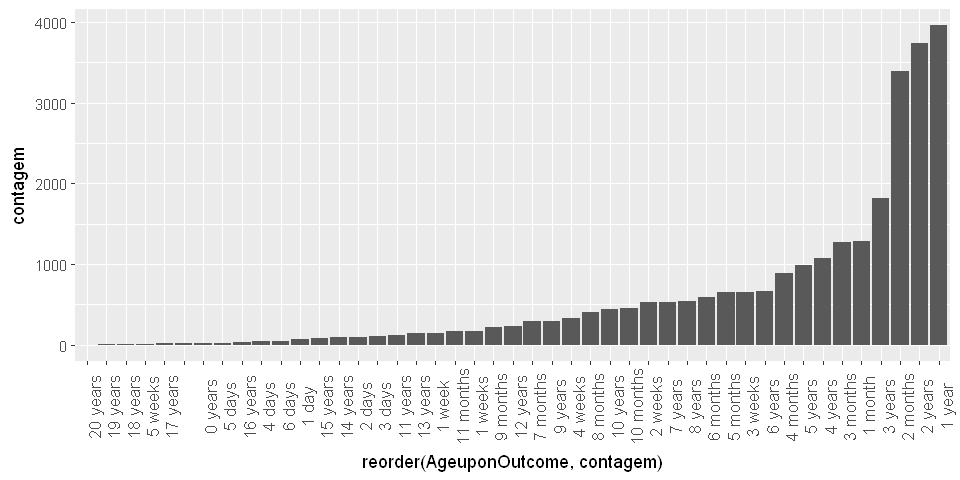

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot( data = dt.AgeuponOutcome.freq, 
           aes(x = reorder(AgeuponOutcome,contagem), y = contagem) ) + 
    geom_col() + theme(axis.text.x = element_text(angle = 90, size = 10))

- (2) O atributo **AgeuponOutcome** descreve quantidades mas é apresentado de forma nominal, misturando anos, meses e semanas. Transforme o atributo AgeuponOutcome para número de dias **DaysuponOutcome**. Transforme o atributo DaysuponOutcome em um atributo discreto (não substitua o atributo original, crie novos atributos), utilizando as seguintes técnicas:

    a. Intervalos de tamanho pré-definidos. Intervalos: [0;1095), [1095;2555), [2555,4380] dias. (atributo *DaysuponOutcome. intervalo_a*)

    b. Intervalos de igual tamanho, sendo o tamanho 3 intervalos. (atributo *DaysuponOutcome.intervalo_b*)

    c. Intervalos com o mesmo número de elementos, sendo 10 intervalos. (atributo *DaysuponOutcome.intervalo_c*)
    
    d. Faça gráficos mostrar como ficou a distribuição dos valores utilizando os diferentes intervalos, nas questões a) e b), para a questão c) calcule a média e o desvio padrão de cada intervalo.

#### Transformando o Atributo AgeuponOutcome

1. O atributo é uma string com no máximo dois termos: o número e a unidade de medida (year, month, etc.). Então, divide-se o atributo em duas colunas, uma para cada termo;

2. Transforma-se cada medida em um número em dias;

3. Convertem-se as duas colunas para formato numérico;

4. Faz-se a multiplicação das colunas em uma nova coluna **DaysuponOutcome**;

In [10]:
dt.aux <- data.table(AgeuponOutcome = dt$AgeuponOutcome)
dt.aux <- dt.aux[, c("Numero","Unidade") := tstrsplit(AgeuponOutcome," ",fixed=T) ]
head(dt.aux)

AgeuponOutcome Numero Unidade
1 1 year         1      year   
2 1 year         1      year   
3 2 years        2      years  
4 3 weeks        3      weeks  
5 2 years        2      years  
6 1 month        1      month

In [11]:
dt.aux$Unidade <- gsub("year(\\w?)" ,"365", dt.aux$Unidade )
dt.aux$Unidade <- gsub("month(\\w?)","30",  dt.aux$Unidade )
dt.aux$Unidade <- gsub("week(\\w?)" ,"7",   dt.aux$Unidade )
dt.aux$Unidade <- gsub("day(\\w?)"  ,"1",   dt.aux$Unidade )
dt.aux$Unidade <- gsub("^$"         ,NA ,   dt.aux$Unidade )
head(dt.aux)

AgeuponOutcome Numero Unidade
1 1 year         1      365    
2 1 year         1      365    
3 2 years        2      365    
4 3 weeks        3      7      
5 2 years        2      365    
6 1 month        1      30

In [12]:
dt.aux$Numero <- as.numeric(dt.aux$Numero)
dt.aux$Unidade <- as.numeric(dt.aux$Unidade)
dt.aux$DaysuponOutcome <- dt.aux$Numero * dt.aux$Unidade
head(dt.aux)

AgeuponOutcome Numero Unidade DaysuponOutcome
1 1 year         1      365     365            
2 1 year         1      365     365            
3 2 years        2      365     730            
4 3 weeks        3        7      21            
5 2 years        2      365     730            
6 1 month        1       30      30

In [13]:
dt$DaysuponOutcome <- dt.aux$DaysuponOutcome
head(dt,4)

AnimalID Name    DateTime            OutcomeType     OutcomeSubtype
1 A671945  Hambone 2014-02-12 18:22:00 Return_to_owner               
2 A656520  Emily   2013-10-13 12:44:00 Euthanasia      Suffering     
3 A686464  Pearce  2015-01-31 12:28:00 Adoption        Foster        
4 A683430          2014-07-11 19:09:00 Transfer        Partner       
  AnimalType SexuponOutcome AgeuponOutcome Breed                  Color      
1 Dog        Neutered Male  1 year         Shetland Sheepdog Mix  Brown/White
2 Cat        Spayed Female  1 year         Domestic Shorthair Mix Cream Tabby
3 Dog        Neutered Male  2 years        Pit Bull Mix           Blue/White 
4 Cat        Intact Male    3 weeks        Domestic Shorthair Mix Blue Cream 
  a        b      DaysuponOutcome
1 Neutered Male   365            
2 Spayed   Female 365            
3 Neutered Male   730            
4 Intact   Male    21

Warning message:
"Removed 18 rows containing non-finite values (stat_bin)."

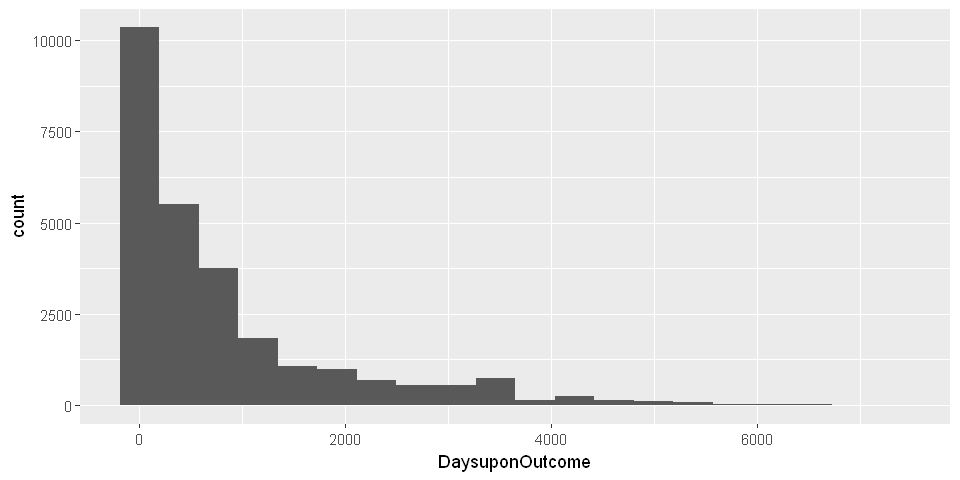

In [14]:
ggplot(data = dt, aes(x=DaysuponOutcome)) + geom_histogram(bins=20)

#### Intervalos de Tamanho Pré-definido

In [15]:
x <- dt$DaysuponOutcome
# [0;1095), [1095;2555), [2555,4380]
dt$DaysuponOutcome.intervalo_a  <- ifelse(x < 1095, "[0;1095)",
                                   ifelse(x < 2555, "[1095;555)",
                                   ifelse(x <= 4380, "[2555;4380]",
                                   ifelse(x > 4380, "(4380;inf)", NA))))

In [16]:
dt[, .(contagem = .N),by=DaysuponOutcome.intervalo_a]

DaysuponOutcome.intervalo_a contagem
1 [0;1095)                    19601   
2 [1095;555)                   4556   
3 [2555;4380]                  2161   
4 (4380;inf)                    393   
5 NA                             18

#### Intervalos de Igual Tamanho

- Relembrando a equação de cálculo do comprimento do intervalo, $L$:

$$L = \frac{max(\mathbf{x}) - min(\mathbf{x}) + 1}{k}$$

- Após isso, usamos divisão de números inteiros para encaixar os valores nos intervalos

- Criando uma função para calcular os intervalos, considerando igual tamanho

In [26]:
intervalos.igual.tamanho <- function( x, k ) {
    min <- min(x, na.rm = T)
    max <- max(x, na.rm = T)
    L <- (max - min + 1) / k
    x.new <- (x - min) %/% L
    x.new
}

dt$DaysuponOutcome.intervalo_b <- intervalos.igual.tamanho(x = dt$DaysuponOutcome, k = 3)

In [18]:
dt[, .(contagem = .N),by=DaysuponOutcome.intervalo_b]

DaysuponOutcome.intervalo_b contagem
1  0                          24157   
2  1                           2304   
3  2                            250   
4 NA                             18

- Usando o a função *discretize* da biblioteca *arules* obtemos o mesmo resultado de contagem, porem eles já coloca nomes apropriados aos intervalos:

In [30]:
library(arules)
dt$DaysuponOutcome.intervalo_b <- discretize(dt$DaysuponOutcome, 
                                              method="interval", 
                                              categories = 3)

dt[, .(contagem = .N),by=DaysuponOutcome.intervalo_b]

DaysuponOutcome.intervalo_b contagem
1 [   0,2433)                 24157   
2 [2433,4867)                  2304   
3 [4867,7300]                   250   
4 NA                             18

#### Intervalos de Igual Frequência

In [36]:
intervalos.igual.frequencia <- function( x, k ){
    x.rank <- rank(x, na.last = "keep", ties.method = "min")    
    x.new <- intervalos.igual.tamanho(x.rank, k)
    x.new
}

dt$DaysuponOutcome.intervalo_c <- intervalos.igual.frequencia(x = dt$DaysuponOutcome, k = 10)

dt[, .(contagem = .N),by=DaysuponOutcome.intervalo_c]

DaysuponOutcome.intervalo_c contagem
1   4                          4816    
2   5                          3742    
3   0                          3540    
4   3                          2818    
5   8                          2733    
6   2                          1277    
7   1                          3408    
8   9                          2554    
9   7                          1823    
10 NA                            18

Também podemos usar um método pronto da biblioteca **arules**

In [35]:
dt$DaysuponOutcome.intervalo_c <- discretize(dt$DaysuponOutcome, 
                                              method="frequency", 
                                              categories = 10)

dt[, .(contagem = .N),by=DaysuponOutcome.intervalo_c]

DaysuponOutcome.intervalo_c contagem
1  [ 270, 730)                 4816    
2   730                        3742    
3  [   0,  35)                 3540    
4  [ 120, 270)                 2818    
5  [1460,2555)                 2733    
6    90                        1277    
7  [  35,  90)                 3408    
8  [2555,7300]                 2554    
9  1095                        1823    
10 NA                            18

#### Gráficos

In [23]:
options(repr.plot.width=5, repr.plot.height=3)
ggplot(dt, aes(x = DaysuponOutcome.intervalo_a)) + geom_bar()

Warning message:
"Removed 18 rows containing non-finite values (stat_count)."

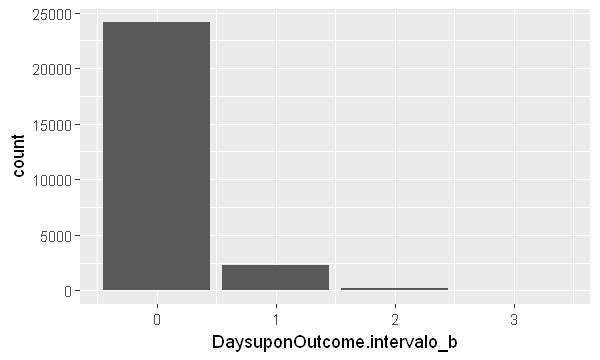

In [24]:
ggplot(dt, aes(x = DaysuponOutcome.intervalo_b)) + geom_bar()

In [25]:
ggplot(dt, aes(x = DaysuponOutcome.intervalo_c)) + geom_bar() + coord_flip()

In [26]:
dt[ , .(media = mean(DaysuponOutcome), 
        desvio.padrao = sd(DaysuponOutcome)), 
   by = DaysuponOutcome.intervalo_c]

DaysuponOutcome.intervalo_c media      desvio.padrao
1  [ 270, 730)                  353.20702  26.906988   
2   730                         730.00000   0.000000   
3  [   0,  35)                   20.46808   9.890320   
4  [ 120, 270)                  165.77715  41.791392   
5  [1460,2555)                 1771.44530 286.408946   
6    90                          90.00000   0.000000   
7  [  35,  90)                   59.91931   1.418235   
8  [2555,7300]                 3556.39193 921.739588   
9  1095                        1095.00000   0.000000   
10 NA                                  NA         NA

In [27]:
dt[ , .(media = round(mean(DaysuponOutcome)), 
        desvio.padrao = round(sd(DaysuponOutcome))), 
   by = DaysuponOutcome.intervalo_c]

DaysuponOutcome.intervalo_c media desvio.padrao
1  [ 270, 730)                  353   27          
2   730                         730    0          
3  [   0,  35)                   20   10          
4  [ 120, 270)                  166   42          
5  [1460,2555)                 1771  286          
6    90                          90    0          
7  [  35,  90)                   60    1          
8  [2555,7300]                 3556  922          
9  1095                        1095    0          
10 NA                            NA   NA

- (3) Ainda em relação ao atributo **DaysuponOutcome**, calcule:

    a. Média, desvio padrão.

    b. Mediana, Valor mínimo e Valor máximo.

    c. Crie os novos atributos com os valores normalizados com as técncias de normalização linear, desvio padrão e valor máximo.

- (4) Mostre o novo conjunto de dados incluíndo os atributos criados e seus valores.

- (5) O atributo **DateTime** corresponde à data e hora do animal aochegar ao abrigo. Extraia diferentes informações sobre esse atributo complexo: como o período (manhã, tarde, noite, madrugada), dia da semana em número, dia da semana extenso, entre outros. Procurar na documentação do pacote *libridate*.